# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
dataset=pd.read_csv("car_data.csv")

In [3]:
dataset.head()

full_name selling_price  \
0                                 Maruti Alto Std     1.2 Lakh*   
1                          Hyundai Grand i10 Asta     5.5 Lakh*   
2                                Hyundai i20 Asta    2.15 Lakh*   
3                   Maruti Alto K10 2010-2014 VXI    2.26 Lakh*   
4  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV     5.7 Lakh*   

                                        new_price  year seller_type  \
0                                             NaN  2012  Individual   
1    New Car (On-Road Price) : Rs.7.11-7.48 Lakh*  2016  Individual   
2                                             NaN  2010  Individual   
3                                             NaN  2012  Individual   
4  New Car (On-Road Price) : Rs.10.14-13.79 Lakh*  2015      Dealer   

      km_driven   owner_type fuel_type transmission_type            mileage  \
0  1,20,000 kms  First Owner    Petrol            Manual   Mileage19.7 kmpl   
1    20,000 kms  First Owner    Petrol            Manual   Mileage18.9 kmpl   
2    60,000 kms  First Owner    Petrol            Manual   Mileage17.0 kmpl   
3    37,000 kms  First Owner    Petrol            Manual  Mileage20.92 kmpl   
4    30,000 kms  First Owner    Diesel            Manual  Mileage22.77 kmpl   

          engine           max_power   seats  
0   Engine796 CC   Max Power46.3 bhp  Seats5  
1  Engine1197 CC     Max Power82 bhp  Seats5  
2  Engine1197 CC     Max Power80 bhp  Seats5  
3   Engine998 CC   Max Power67.1 bhp  Seats5  
4  Engine1498 CC  Max Power98.59 bhp  Seats5

In [4]:
dataset.shape

(19974, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19974 entries, 0 to 19973
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   full_name          19974 non-null  object
 1   selling_price      19974 non-null  object
 2   new_price          9564 non-null   object
 3   year               19974 non-null  int64 
 4   seller_type        19974 non-null  object
 5   km_driven          19974 non-null  object
 6   owner_type         19974 non-null  object
 7   fuel_type          19974 non-null  object
 8   transmission_type  19974 non-null  object
 9   mileage            19814 non-null  object
 10  engine             19864 non-null  object
 11  max_power          19637 non-null  object
 12  seats              19887 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


In [6]:
dataset.describe()

year
count  19974.000000
mean    2014.526134
std        3.248791
min     1991.000000
25%     2013.000000
50%     2015.000000
75%     2017.000000
max     2021.000000

# Data Cleaning and Preprocessing


### Renaming Columns

In [7]:
dataset=dataset.rename(columns={'full_name':'Full_Name', 'selling_price':'Selling_Price', 'new_price':'New_Price' , 'year':'Year', 'seller_type':'Seller_Type','km_driven':'Kms_Driven','owner_type':'Owner_Type', 'fuel_type':'Fuel_Type', 'transmission_type':'Transmission_Type', 'mileage':'Mileage', 'engine':'Engine','max_power':'Max_Power', 'seats':'Seats'})

In [8]:
dataset.head()

Full_Name Selling_Price  \
0                                 Maruti Alto Std     1.2 Lakh*   
1                          Hyundai Grand i10 Asta     5.5 Lakh*   
2                                Hyundai i20 Asta    2.15 Lakh*   
3                   Maruti Alto K10 2010-2014 VXI    2.26 Lakh*   
4  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV     5.7 Lakh*   

                                        New_Price  Year Seller_Type  \
0                                             NaN  2012  Individual   
1    New Car (On-Road Price) : Rs.7.11-7.48 Lakh*  2016  Individual   
2                                             NaN  2010  Individual   
3                                             NaN  2012  Individual   
4  New Car (On-Road Price) : Rs.10.14-13.79 Lakh*  2015      Dealer   

     Kms_Driven   Owner_Type Fuel_Type Transmission_Type            Mileage  \
0  1,20,000 kms  First Owner    Petrol            Manual   Mileage19.7 kmpl   
1    20,000 kms  First Owner    Petrol            Manual   Mileage18.9 kmpl   
2    60,000 kms  First Owner    Petrol            Manual   Mileage17.0 kmpl   
3    37,000 kms  First Owner    Petrol            Manual  Mileage20.92 kmpl   
4    30,000 kms  First Owner    Diesel            Manual  Mileage22.77 kmpl   

          Engine           Max_Power   Seats  
0   Engine796 CC   Max Power46.3 bhp  Seats5  
1  Engine1197 CC     Max Power82 bhp  Seats5  
2  Engine1197 CC     Max Power80 bhp  Seats5  
3   Engine998 CC   Max Power67.1 bhp  Seats5  
4  Engine1498 CC  Max Power98.59 bhp  Seats5

### Dropping NULL Values

In [9]:
dataset.isnull().sum()

Full_Name                0
Selling_Price            0
New_Price            10410
Year                     0
Seller_Type              0
Kms_Driven               0
Owner_Type               0
Fuel_Type                0
Transmission_Type        0
Mileage                160
Engine                 110
Max_Power              337
Seats                   87
dtype: int64

### Dropping NULL values except in Column 'New_Price'

In [10]:
dataset=dataset.dropna(subset=['Mileage','Engine','Max_Power','Seats'])

In [11]:
dataset.shape

(19542, 13)

### Creating a Column 'Car_Age' using 'Year'

In [12]:
dataset_year=2021
dataset['Car_Age']=dataset_year-dataset['Year']
dataset.drop(['Year'],axis=1,inplace=True)

In [13]:
dataset.head()

Full_Name Selling_Price  \
0                                 Maruti Alto Std     1.2 Lakh*   
1                          Hyundai Grand i10 Asta     5.5 Lakh*   
2                                Hyundai i20 Asta    2.15 Lakh*   
3                   Maruti Alto K10 2010-2014 VXI    2.26 Lakh*   
4  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV     5.7 Lakh*   

                                        New_Price Seller_Type    Kms_Driven  \
0                                             NaN  Individual  1,20,000 kms   
1    New Car (On-Road Price) : Rs.7.11-7.48 Lakh*  Individual    20,000 kms   
2                                             NaN  Individual    60,000 kms   
3                                             NaN  Individual    37,000 kms   
4  New Car (On-Road Price) : Rs.10.14-13.79 Lakh*      Dealer    30,000 kms   

    Owner_Type Fuel_Type Transmission_Type            Mileage         Engine  \
0  First Owner    Petrol            Manual   Mileage19.7 kmpl   Engine796 CC   
1  First Owner    Petrol            Manual   Mileage18.9 kmpl  Engine1197 CC   
2  First Owner    Petrol            Manual   Mileage17.0 kmpl  Engine1197 CC   
3  First Owner    Petrol            Manual  Mileage20.92 kmpl   Engine998 CC   
4  First Owner    Diesel            Manual  Mileage22.77 kmpl  Engine1498 CC   

            Max_Power   Seats  Car_Age  
0   Max Power46.3 bhp  Seats5        9  
1     Max Power82 bhp  Seats5        5  
2     Max Power80 bhp  Seats5       11  
3   Max Power67.1 bhp  Seats5        9  
4  Max Power98.59 bhp  Seats5        6

### Creating Columns 'Brand' and 'Model' using 'Full_Name'

In [14]:
# Creating Brand
dataset['Full_Name'] = dataset['Full_Name'].str.replace(" New ", " ")
dataset['Brand']=dataset.Full_Name.str.split(' ').str.get(0)
dataset.loc[(dataset.Brand == 'Land'),'Brand']='Land Rover'

# Creating Model
dataset['Model']=dataset['Full_Name'].apply(lambda x: ' '.join(x.split(' ')[1:3]) if 'Dzire' in x else ''.join(x.split(' ')[1]))

In [15]:
dataset.head()

Full_Name Selling_Price  \
0                                 Maruti Alto Std     1.2 Lakh*   
1                          Hyundai Grand i10 Asta     5.5 Lakh*   
2                                Hyundai i20 Asta    2.15 Lakh*   
3                   Maruti Alto K10 2010-2014 VXI    2.26 Lakh*   
4  Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV     5.7 Lakh*   

                                        New_Price Seller_Type    Kms_Driven  \
0                                             NaN  Individual  1,20,000 kms   
1    New Car (On-Road Price) : Rs.7.11-7.48 Lakh*  Individual    20,000 kms   
2                                             NaN  Individual    60,000 kms   
3                                             NaN  Individual    37,000 kms   
4  New Car (On-Road Price) : Rs.10.14-13.79 Lakh*      Dealer    30,000 kms   

    Owner_Type Fuel_Type Transmission_Type            Mileage         Engine  \
0  First Owner    Petrol            Manual   Mileage19.7 kmpl   Engine796 CC   
1  First Owner    Petrol            Manual   Mileage18.9 kmpl  Engine1197 CC   
2  First Owner    Petrol            Manual   Mileage17.0 kmpl  Engine1197 CC   
3  First Owner    Petrol            Manual  Mileage20.92 kmpl   Engine998 CC   
4  First Owner    Diesel            Manual  Mileage22.77 kmpl  Engine1498 CC   

            Max_Power   Seats  Car_Age    Brand     Model  
0   Max Power46.3 bhp  Seats5        9   Maruti      Alto  
1     Max Power82 bhp  Seats5        5  Hyundai     Grand  
2     Max Power80 bhp  Seats5       11  Hyundai       i20  
3   Max Power67.1 bhp  Seats5        9   Maruti      Alto  
4  Max Power98.59 bhp  Seats5        6     Ford  Ecosport

###  Renaming Car Models


In [16]:
dataset.loc[(dataset.Model == 'Wagon'),'Model'] = 'Wagon R'
dataset.loc[(dataset.Model == 'E'),'Model'] = 'E Verito'
dataset.loc[(dataset.Model == 'Land'),'Model'] = 'Land Cruiser'

In [17]:
#Dropping Column 'Full_Name'
dataset.drop(['Full_Name'],axis=1,inplace=True)

### Creating Column 'Car_Name'

In [18]:
dataset['Car_Name']=dataset['Brand']+' '+dataset['Model']
dataset.head()

Selling_Price                                       New_Price Seller_Type  \
0     1.2 Lakh*                                             NaN  Individual   
1     5.5 Lakh*    New Car (On-Road Price) : Rs.7.11-7.48 Lakh*  Individual   
2    2.15 Lakh*                                             NaN  Individual   
3    2.26 Lakh*                                             NaN  Individual   
4     5.7 Lakh*  New Car (On-Road Price) : Rs.10.14-13.79 Lakh*      Dealer   

     Kms_Driven   Owner_Type Fuel_Type Transmission_Type            Mileage  \
0  1,20,000 kms  First Owner    Petrol            Manual   Mileage19.7 kmpl   
1    20,000 kms  First Owner    Petrol            Manual   Mileage18.9 kmpl   
2    60,000 kms  First Owner    Petrol            Manual   Mileage17.0 kmpl   
3    37,000 kms  First Owner    Petrol            Manual  Mileage20.92 kmpl   
4    30,000 kms  First Owner    Diesel            Manual  Mileage22.77 kmpl   

          Engine           Max_Power   Seats  Car_Age    Brand     Model  \
0   Engine796 CC   Max Power46.3 bhp  Seats5        9   Maruti      Alto   
1  Engine1197 CC     Max Power82 bhp  Seats5        5  Hyundai     Grand   
2  Engine1197 CC     Max Power80 bhp  Seats5       11  Hyundai       i20   
3   Engine998 CC   Max Power67.1 bhp  Seats5        9   Maruti      Alto   
4  Engine1498 CC  Max Power98.59 bhp  Seats5        6     Ford  Ecosport   

        Car_Name  
0    Maruti Alto  
1  Hyundai Grand  
2    Hyundai i20  
3    Maruti Alto  
4  Ford Ecosport

### Converting the Column 'New_Price' into Columns 'Min_Price' and 'Max_Price'

In [19]:
dataset['New_Price1']=dataset['New_Price'].str.lstrip('New Car (On-Road Price) : Rs.')
dataset.New_Price1=dataset.New_Price1.str.replace('[*,,]', '')

dataset[['New_Price1','unit']] = dataset.New_Price1.str.split(" ",expand=True)

dataset[['Min_Price','Max_Price']] = dataset.New_Price1.str.split("-",expand=True)
dataset.Min_Price = dataset.Min_Price.str.replace('[A-Za-z]', '')
dataset.Max_Price = dataset.Max_Price.str.replace('[A-Za-z]', '')

#Dropping Column 'New_Price1'
dataset.drop(['New_Price1'],axis=1)

dataset.head()

Selling_Price                                       New_Price Seller_Type  \
0     1.2 Lakh*                                             NaN  Individual   
1     5.5 Lakh*    New Car (On-Road Price) : Rs.7.11-7.48 Lakh*  Individual   
2    2.15 Lakh*                                             NaN  Individual   
3    2.26 Lakh*                                             NaN  Individual   
4     5.7 Lakh*  New Car (On-Road Price) : Rs.10.14-13.79 Lakh*      Dealer   

     Kms_Driven   Owner_Type Fuel_Type Transmission_Type            Mileage  \
0  1,20,000 kms  First Owner    Petrol            Manual   Mileage19.7 kmpl   
1    20,000 kms  First Owner    Petrol            Manual   Mileage18.9 kmpl   
2    60,000 kms  First Owner    Petrol            Manual   Mileage17.0 kmpl   
3    37,000 kms  First Owner    Petrol            Manual  Mileage20.92 kmpl   
4    30,000 kms  First Owner    Diesel            Manual  Mileage22.77 kmpl   

          Engine           Max_Power   Seats  Car_Age    Brand     Model  \
0   Engine796 CC   Max Power46.3 bhp  Seats5        9   Maruti      Alto   
1  Engine1197 CC     Max Power82 bhp  Seats5        5  Hyundai     Grand   
2  Engine1197 CC     Max Power80 bhp  Seats5       11  Hyundai       i20   
3   Engine998 CC   Max Power67.1 bhp  Seats5        9   Maruti      Alto   
4  Engine1498 CC  Max Power98.59 bhp  Seats5        6     Ford  Ecosport   

        Car_Name   New_Price1  unit Min_Price Max_Price  
0    Maruti Alto          NaN   NaN       NaN       NaN  
1  Hyundai Grand    7.11-7.48  Lakh      7.11      7.48  
2    Hyundai i20          NaN   NaN       NaN       NaN  
3    Maruti Alto          NaN   NaN       NaN       NaN  
4  Ford Ecosport  10.14-13.79  Lakh     10.14     13.79

### Changing Datatypes of Columns 'Min_Price' and 'Max_Price' to float

In [20]:
dataset['Min_Price']=dataset['Min_Price'].astype('float64', errors = 'raise')
dataset['Max_Price']=dataset['Max_Price'].astype('float64', errors = 'raise')

### Converting Min and Max Prices to an appropriate units

In [21]:
dataset.loc[dataset.unit == "Lakh", 'Min_Price'] = dataset['Min_Price']*100000.0
dataset.loc[dataset.unit == "Lakh", 'Max_Price'] = dataset['Max_Price']*100000.0

dataset.loc[dataset.unit == "Cr", 'Min_Price'] = dataset['Min_Price']*10000000.0
dataset.loc[dataset.unit == "Cr", 'Max_Price'] = dataset['Max_Price']*10000000.0

#Dropping Column 'New_Price1'
dataset.drop(['unit','New_Price1'],axis=1, inplace=True)

### Filling Car Price with 'Min_Price' whose 'Max_Price' is Missing

In [22]:
dataset['Max_Price'] = dataset['Max_Price'].fillna(dataset['Min_Price'])
dataset.drop(dataset[(dataset['Max_Price'])==(dataset['Min_Price'])].index, inplace=True)
dataset.shape

(19261, 17)

### Filling the missing Car Prices with the mean of their respective Car Models


In [23]:
dataset['Min_Price'] = dataset['Min_Price'].fillna(dataset.groupby(['Car_Name'])['Min_Price'].transform('mean'))
dataset['Max_Price'] = dataset['Max_Price'].fillna(dataset.groupby(['Car_Name'])['Max_Price'].transform('mean'))
dataset.shape

(19261, 17)

### Converting Column 'Selling_Price' to an appropriate units

In [24]:
dataset.Selling_Price = dataset.Selling_Price.str.replace('[*,,]', '')
dataset[['Selling_Price','unit']] = dataset.Selling_Price.str.split(expand=True)
dataset['Selling_Price'] = dataset['Selling_Price'].astype('float64', errors = 'raise')

dataset.head()

Selling_Price                                       New_Price Seller_Type  \
0           1.20                                             NaN  Individual   
1           5.50    New Car (On-Road Price) : Rs.7.11-7.48 Lakh*  Individual   
2           2.15                                             NaN  Individual   
3           2.26                                             NaN  Individual   
4           5.70  New Car (On-Road Price) : Rs.10.14-13.79 Lakh*      Dealer   

     Kms_Driven   Owner_Type Fuel_Type Transmission_Type            Mileage  \
0  1,20,000 kms  First Owner    Petrol            Manual   Mileage19.7 kmpl   
1    20,000 kms  First Owner    Petrol            Manual   Mileage18.9 kmpl   
2    60,000 kms  First Owner    Petrol            Manual   Mileage17.0 kmpl   
3    37,000 kms  First Owner    Petrol            Manual  Mileage20.92 kmpl   
4    30,000 kms  First Owner    Diesel            Manual  Mileage22.77 kmpl   

          Engine           Max_Power   Seats  Car_Age    Brand     Model  \
0   Engine796 CC   Max Power46.3 bhp  Seats5        9   Maruti      Alto   
1  Engine1197 CC     Max Power82 bhp  Seats5        5  Hyundai     Grand   
2  Engine1197 CC     Max Power80 bhp  Seats5       11  Hyundai       i20   
3   Engine998 CC   Max Power67.1 bhp  Seats5        9   Maruti      Alto   
4  Engine1498 CC  Max Power98.59 bhp  Seats5        6     Ford  Ecosport   

        Car_Name     Min_Price     Max_Price  unit  
0    Maruti Alto  3.570039e+05  4.654015e+05  Lakh  
1  Hyundai Grand  7.110000e+05  7.480000e+05  Lakh  
2    Hyundai i20  8.540829e+05  1.307926e+06  Lakh  
3    Maruti Alto  3.570039e+05  4.654015e+05  Lakh  
4  Ford Ecosport  1.014000e+06  1.379000e+06  Lakh

In [25]:
dataset.loc[dataset.unit == "Lakh", 'Selling_Price'] = dataset['Selling_Price']*100000.0
dataset.loc[dataset.unit == "Cr", 'Selling_Price'] = dataset['Selling_Price']*10000000.0

#Dropping Column New_Price
dataset=dataset.drop(['unit','New_Price'],axis=1)

dataset.head()

Selling_Price Seller_Type    Kms_Driven   Owner_Type Fuel_Type  \
0       120000.0  Individual  1,20,000 kms  First Owner    Petrol   
1       550000.0  Individual    20,000 kms  First Owner    Petrol   
2       215000.0  Individual    60,000 kms  First Owner    Petrol   
3       226000.0  Individual    37,000 kms  First Owner    Petrol   
4       570000.0      Dealer    30,000 kms  First Owner    Diesel   

  Transmission_Type            Mileage         Engine           Max_Power  \
0            Manual   Mileage19.7 kmpl   Engine796 CC   Max Power46.3 bhp   
1            Manual   Mileage18.9 kmpl  Engine1197 CC     Max Power82 bhp   
2            Manual   Mileage17.0 kmpl  Engine1197 CC     Max Power80 bhp   
3            Manual  Mileage20.92 kmpl   Engine998 CC   Max Power67.1 bhp   
4            Manual  Mileage22.77 kmpl  Engine1498 CC  Max Power98.59 bhp   

    Seats  Car_Age    Brand     Model       Car_Name     Min_Price  \
0  Seats5        9   Maruti      Alto    Maruti Alto  3.570039e+05   
1  Seats5        5  Hyundai     Grand  Hyundai Grand  7.110000e+05   
2  Seats5       11  Hyundai       i20    Hyundai i20  8.540829e+05   
3  Seats5        9   Maruti      Alto    Maruti Alto  3.570039e+05   
4  Seats5        6     Ford  Ecosport  Ford Ecosport  1.014000e+06   

      Max_Price  
0  4.654015e+05  
1  7.480000e+05  
2  1.307926e+06  
3  4.654015e+05  
4  1.379000e+06

### Removing unwanted non-numeric data from columns

In [26]:
rep_cols = [ "Mileage","Kms_Driven","Engine","Max_Power","Seats"]
dataset[rep_cols] = dataset[rep_cols].replace(r'[^\d.]+', '', regex=True)
dataset[rep_cols]= dataset[rep_cols].replace('', '0', regex=True)

In [27]:
#Dropping null values
dataset.dropna(how='any',axis=0, inplace=True)
dataset.shape

(14977, 16)

### Changing datatype to float


In [28]:
dataset= dataset.astype({'Kms_Driven': 'float64', 'Mileage': 'float64', 'Engine': 'float64', 'Max_Power': 'float64', 'Seats': 'float64','Min_Price': 'float64','Max_Price': 'float64'})
print(dataset.dtypes)

Selling_Price        float64
Seller_Type           object
Kms_Driven           float64
Owner_Type            object
Fuel_Type             object
Transmission_Type     object
Mileage              float64
Engine               float64
Max_Power            float64
Seats                float64
Car_Age                int64
Brand                 object
Model                 object
Car_Name              object
Min_Price            float64
Max_Price            float64
dtype: object


### Reordering Columns

In [29]:
col_order=['Car_Name','Brand','Model','Min_Price','Max_Price','Car_Age','Kms_Driven','Seller_Type','Fuel_Type','Transmission_Type','Mileage','Engine','Max_Power','Seats','Selling_Price']
dataset=dataset[col_order]

dataset['Seller_Type']= dataset['Seller_Type'].replace(' ', '_', regex=True)

dataset.head()

Car_Name    Brand     Model     Min_Price     Max_Price  Car_Age  \
0    Maruti Alto   Maruti      Alto  3.570039e+05  4.654015e+05        9   
1  Hyundai Grand  Hyundai     Grand  7.110000e+05  7.480000e+05        5   
2    Hyundai i20  Hyundai       i20  8.540829e+05  1.307926e+06       11   
3    Maruti Alto   Maruti      Alto  3.570039e+05  4.654015e+05        9   
4  Ford Ecosport     Ford  Ecosport  1.014000e+06  1.379000e+06        6   

   Kms_Driven Seller_Type Fuel_Type Transmission_Type  Mileage  Engine  \
0    120000.0  Individual    Petrol            Manual    19.70   796.0   
1     20000.0  Individual    Petrol            Manual    18.90  1197.0   
2     60000.0  Individual    Petrol            Manual    17.00  1197.0   
3     37000.0  Individual    Petrol            Manual    20.92   998.0   
4     30000.0      Dealer    Diesel            Manual    22.77  1498.0   

   Max_Power  Seats  Selling_Price  
0      46.30    5.0       120000.0  
1      82.00    5.0       550000.0  
2      80.00    5.0       215000.0  
3      67.10    5.0       226000.0  
4      98.59    5.0       570000.0

### Removing an Outliers

In [30]:
dataset.describe()

Min_Price     Max_Price       Car_Age    Kms_Driven       Mileage  \
count  1.497700e+04  1.497700e+04  14977.000000  1.497700e+04  14977.000000   
mean   5.896595e+06  1.857358e+06      6.042732  5.560467e+04     19.788459   
std    5.750946e+07  2.785112e+06      3.022912  5.199181e+04      4.156853   
min    3.110000e+05  4.360000e+05      0.000000  1.000000e+02      4.000000   
25%    6.580000e+05  8.548000e+05      4.000000  3.000000e+04     17.000000   
50%    8.540829e+05  1.213855e+06      6.000000  5.000000e+04     19.700000   
75%    1.263000e+06  1.707450e+06      8.000000  7.000000e+04     22.700000   
max    9.880000e+08  9.110000e+07     29.000000  3.800000e+06     33.540000   

             Engine     Max_Power         Seats  Selling_Price  
count  14977.000000  14977.000000  14977.000000   1.497700e+04  
mean    1465.397076     98.411190      5.318088   7.332163e+05  
std      502.986230     39.873207      0.797910   8.181121e+05  
min      793.000000     38.400000      2.000000   4.000000e+04  
25%     1197.000000     74.000000      5.000000   3.800000e+05  
50%     1248.000000     88.500000      5.000000   5.500000e+05  
75%     1582.000000    112.000000      5.000000   7.990000e+05  
max     6592.000000    626.000000      9.000000   3.950000e+07

### Dropping zero valued cells

In [31]:
dataset.drop(dataset[dataset['Seats'] == 0].index, inplace = True)
dataset.drop(dataset[dataset['Mileage'] == 0].index, inplace = True)
dataset.drop(dataset[dataset['Kms_Driven'] == 0].index, inplace = True)
dataset.drop(dataset[dataset['Car_Age'] == 0].index, inplace = True)
dataset.drop(dataset[dataset['Max_Power'] == 0].index, inplace = True)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14972 entries, 0 to 19973
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_Name           14972 non-null  object 
 1   Brand              14972 non-null  object 
 2   Model              14972 non-null  object 
 3   Min_Price          14972 non-null  float64
 4   Max_Price          14972 non-null  float64
 5   Car_Age            14972 non-null  int64  
 6   Kms_Driven         14972 non-null  float64
 7   Seller_Type        14972 non-null  object 
 8   Fuel_Type          14972 non-null  object 
 9   Transmission_Type  14972 non-null  object 
 10  Mileage            14972 non-null  float64
 11  Engine             14972 non-null  float64
 12  Max_Power          14972 non-null  float64
 13  Seats              14972 non-null  float64
 14  Selling_Price      14972 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 2.5+ MB


### Dropping Out the Boundary Values

In [33]:
dataset.drop(dataset[(dataset['Car_Age'] > 20) ].index, inplace = True)
dataset.drop(dataset[dataset['Kms_Driven'] >300000 ].index, inplace = True)

### Removing the Outliers Using Interquartile Range for all the Columns

In [34]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

out_columns = dataset[['Kms_Driven','Car_Age','Mileage','Engine','Max_Power','Seats','Selling_Price','Min_Price','Max_Price']]  
for i in out_columns:
    removeOutliers(dataset, i)

IQR value for column Kms_Driven is: 40000.0
IQR value for column Car_Age is: 4.0
IQR value for column Mileage is: 5.699999999999999
IQR value for column Engine is: 385.0
IQR value for column Max_Power is: 39.400000000000006
IQR value for column Seats is: 0.0
IQR value for column Selling_Price is: 419250.0
IQR value for column Min_Price is: 605000.0
IQR value for column Max_Price is: 852650.4643962849


### Assigning Filtered data back to the Original Variables

In [35]:
dataset=filtered_data
print("Shape of data after outlier removal is: ", dataset.shape)

Shape of data after outlier removal is:  (13475, 15)


# Final Preprocessing of Dataset

### Converting 'Min_Price' and 'Max_Price' to 'Avg_Price' using Mean

In [36]:
dataset['Avg_Price']=(dataset['Min_Price']+dataset['Max_Price'])/2

In [37]:
dataset=dataset.drop(['Min_Price','Max_Price'],axis=1)

In [38]:
dataset['Avg_Price']=dataset['Avg_Price']/100000
dataset['Selling_Price']=dataset['Selling_Price']/100000

In [39]:
dataset.head()

Car_Name    Brand     Model  Car_Age  Kms_Driven Seller_Type  \
0    Maruti Alto   Maruti      Alto        9    120000.0  Individual   
1  Hyundai Grand  Hyundai     Grand        5     20000.0  Individual   
2    Hyundai i20  Hyundai       i20       11     60000.0  Individual   
3    Maruti Alto   Maruti      Alto        9     37000.0  Individual   
4  Ford Ecosport     Ford  Ecosport        6     30000.0      Dealer   

  Fuel_Type Transmission_Type  Mileage  Engine  Max_Power  Seats  \
0    Petrol            Manual    19.70   796.0      46.30    5.0   
1    Petrol            Manual    18.90  1197.0      82.00    5.0   
2    Petrol            Manual    17.00  1197.0      80.00    5.0   
3    Petrol            Manual    20.92   998.0      67.10    5.0   
4    Diesel            Manual    22.77  1498.0      98.59    5.0   

   Selling_Price  Avg_Price  
0           1.20   4.112027  
1           5.50   7.295000  
2           2.15  10.810042  
3           2.26   4.112027  
4           5.70  11.965000

# Exploratory Data Analysis

### Variation in 'Selling_Price'  and  'Avg_Price'  wrt  'Car_Name'

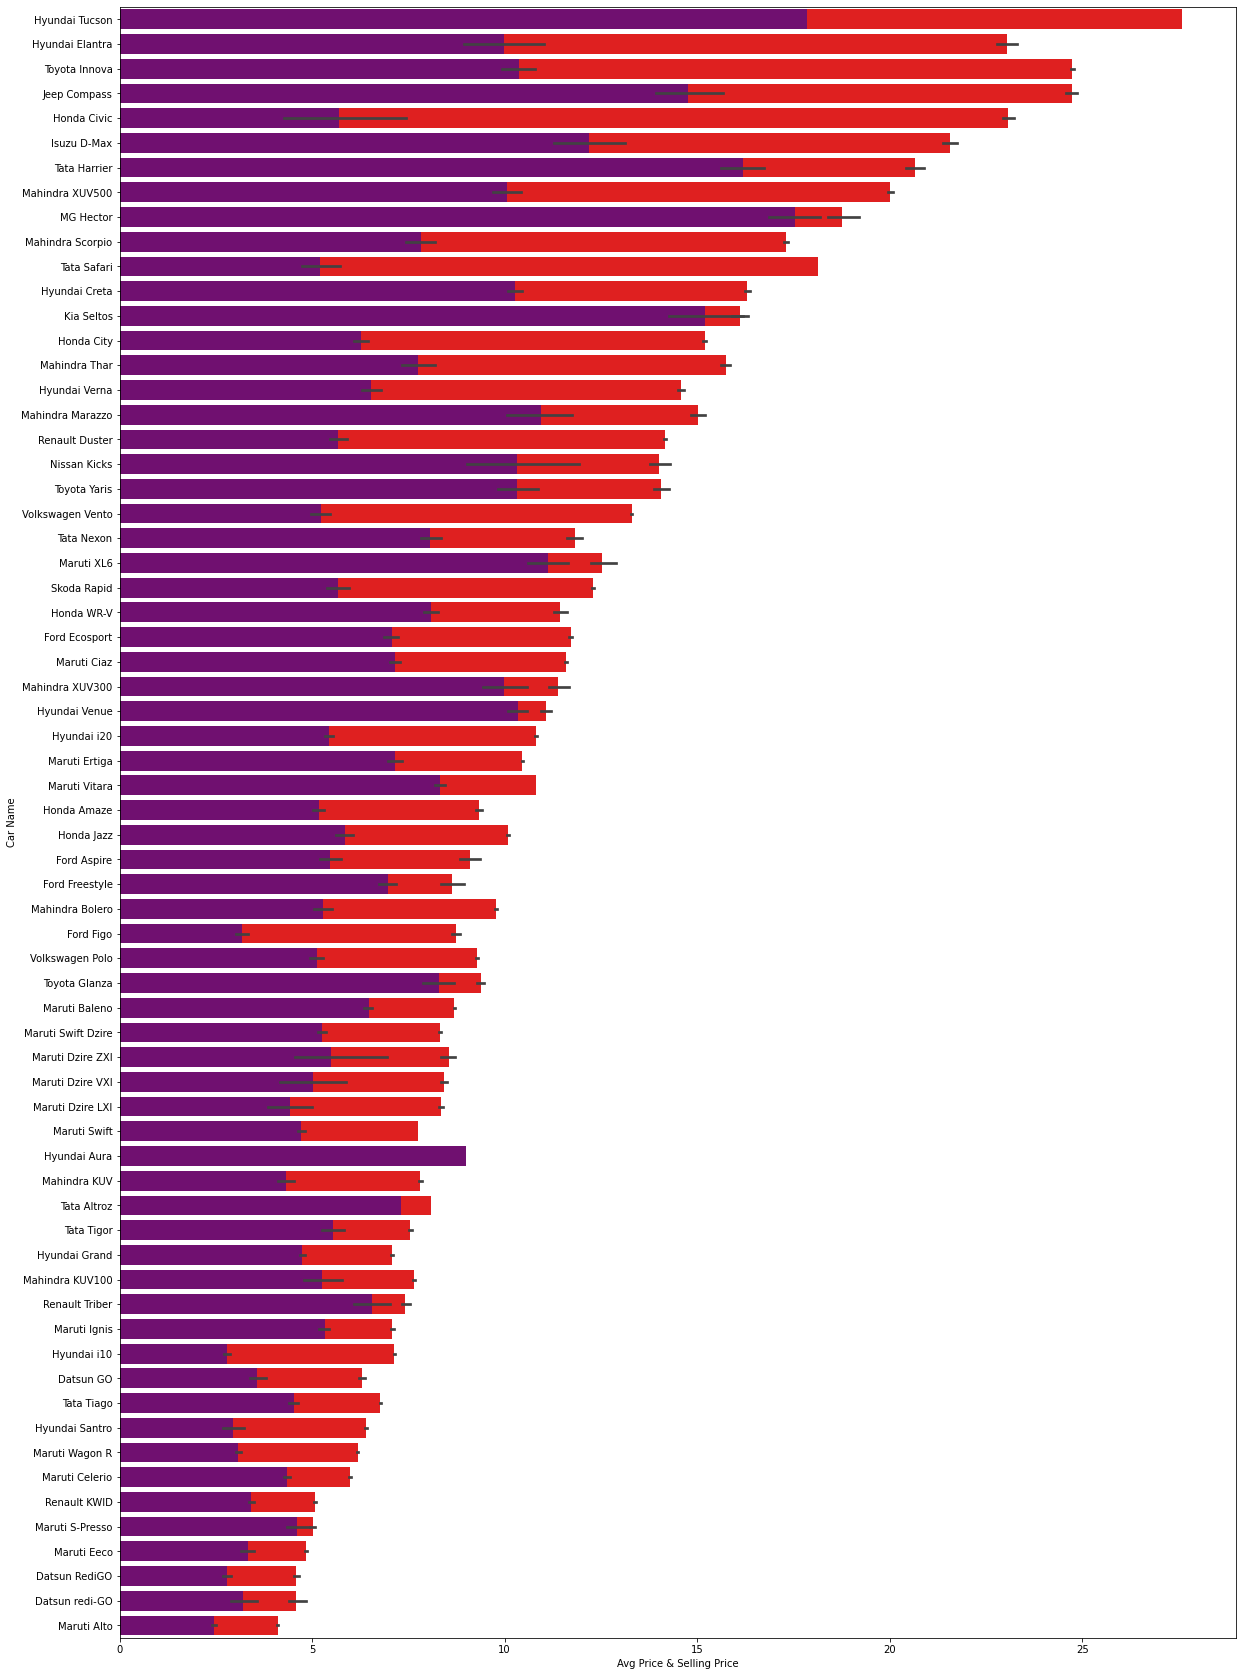

In [40]:
top_sell=dataset.sort_values(by='Avg_Price', ascending=False)

ax=plt.subplots(figsize=(20,30))
  
# plotting columns
ax=sns.barplot(x=top_sell.Avg_Price,y=top_sell.Car_Name,color='Red')
ax=sns.barplot(x=top_sell.Selling_Price,y=top_sell.Car_Name,color='Purple')
  
# renaming the axes
ax.set(xlabel="Avg Price & Selling Price", ylabel="Car Name")
  
# visulaizing illustration
plt.show()


### Dropping Hyundai Aura From 'Car_Name'

In [41]:
#Data from Hyundai Aura Cars is misleading because their Selling Prices and Avg Prices are equal
dataset.drop(dataset[dataset['Car_Name']=='Hyundai Aura'].index, axis=0,  inplace=True)

### Variation in 'Selling_Price' wrt 'Seller_Type'

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

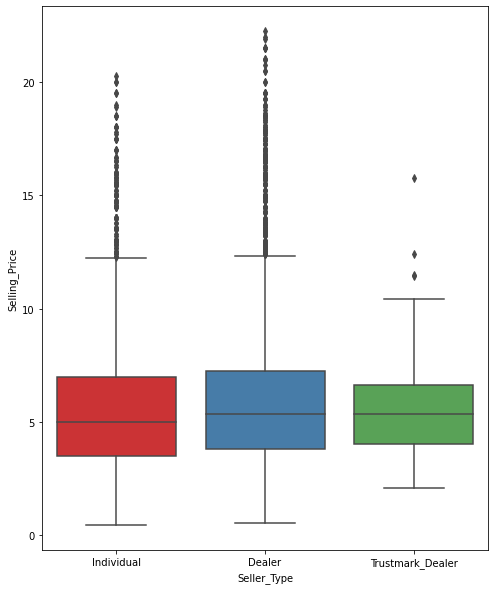

In [42]:
figure = plt.figure(figsize=(8,10))
sns.boxplot(x='Seller_Type',y='Selling_Price', data=dataset, palette="Set1")

### Count of Seller Types

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

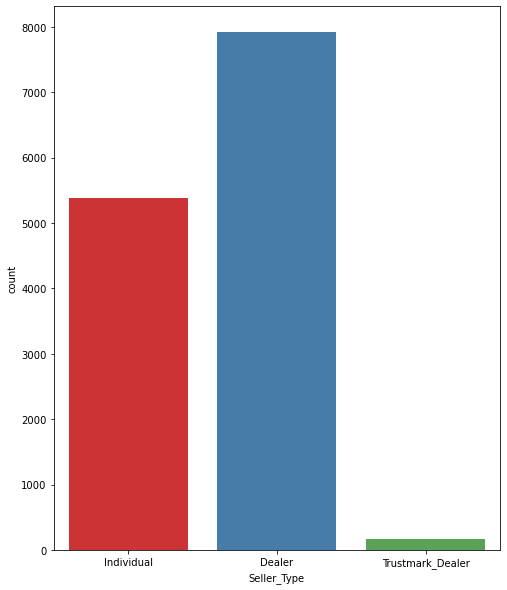

In [43]:
figure = plt.figure(figsize=(8,10))
sns.countplot(x='Seller_Type', data=dataset, palette="Set1")

### Count of Fuel Types

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

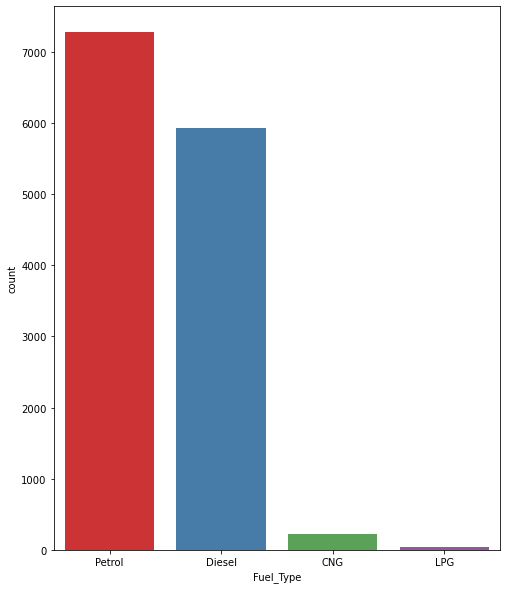

In [44]:
figure = plt.figure(figsize=(8,10))
sns.countplot(x='Fuel_Type',data=dataset,palette="Set1")

### Variation in 'Selling_Price' wrt 'Car_Age'

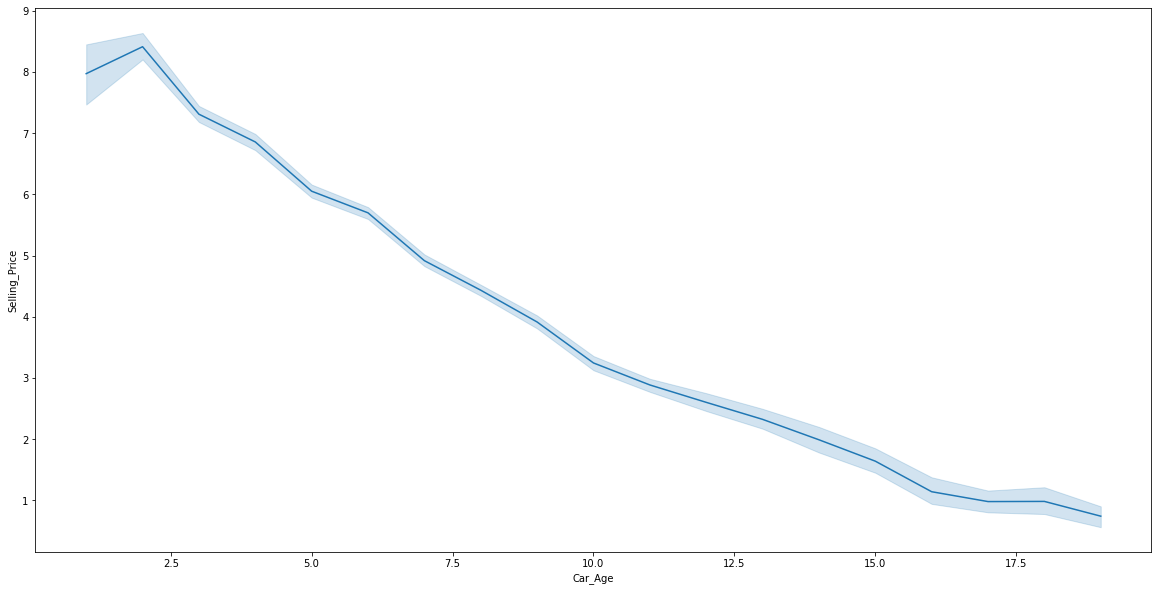

In [45]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Car_Age',y='Selling_Price',data=dataset)
plt.ticklabel_format(style='plain')

### 3d Scatter Plot of 'Selling_Price' vs 'Vehicle_Age' vs 'Kms_Driven'

In [46]:
#group_by 'Brand'
plt.figure(figsize=(40,40))
fig = px.scatter_3d(dataset,x='Car_Age',y='Kms_Driven',z='Selling_Price',color='Brand')
fig.show()

<Figure size 2880x2880 with 0 Axes>

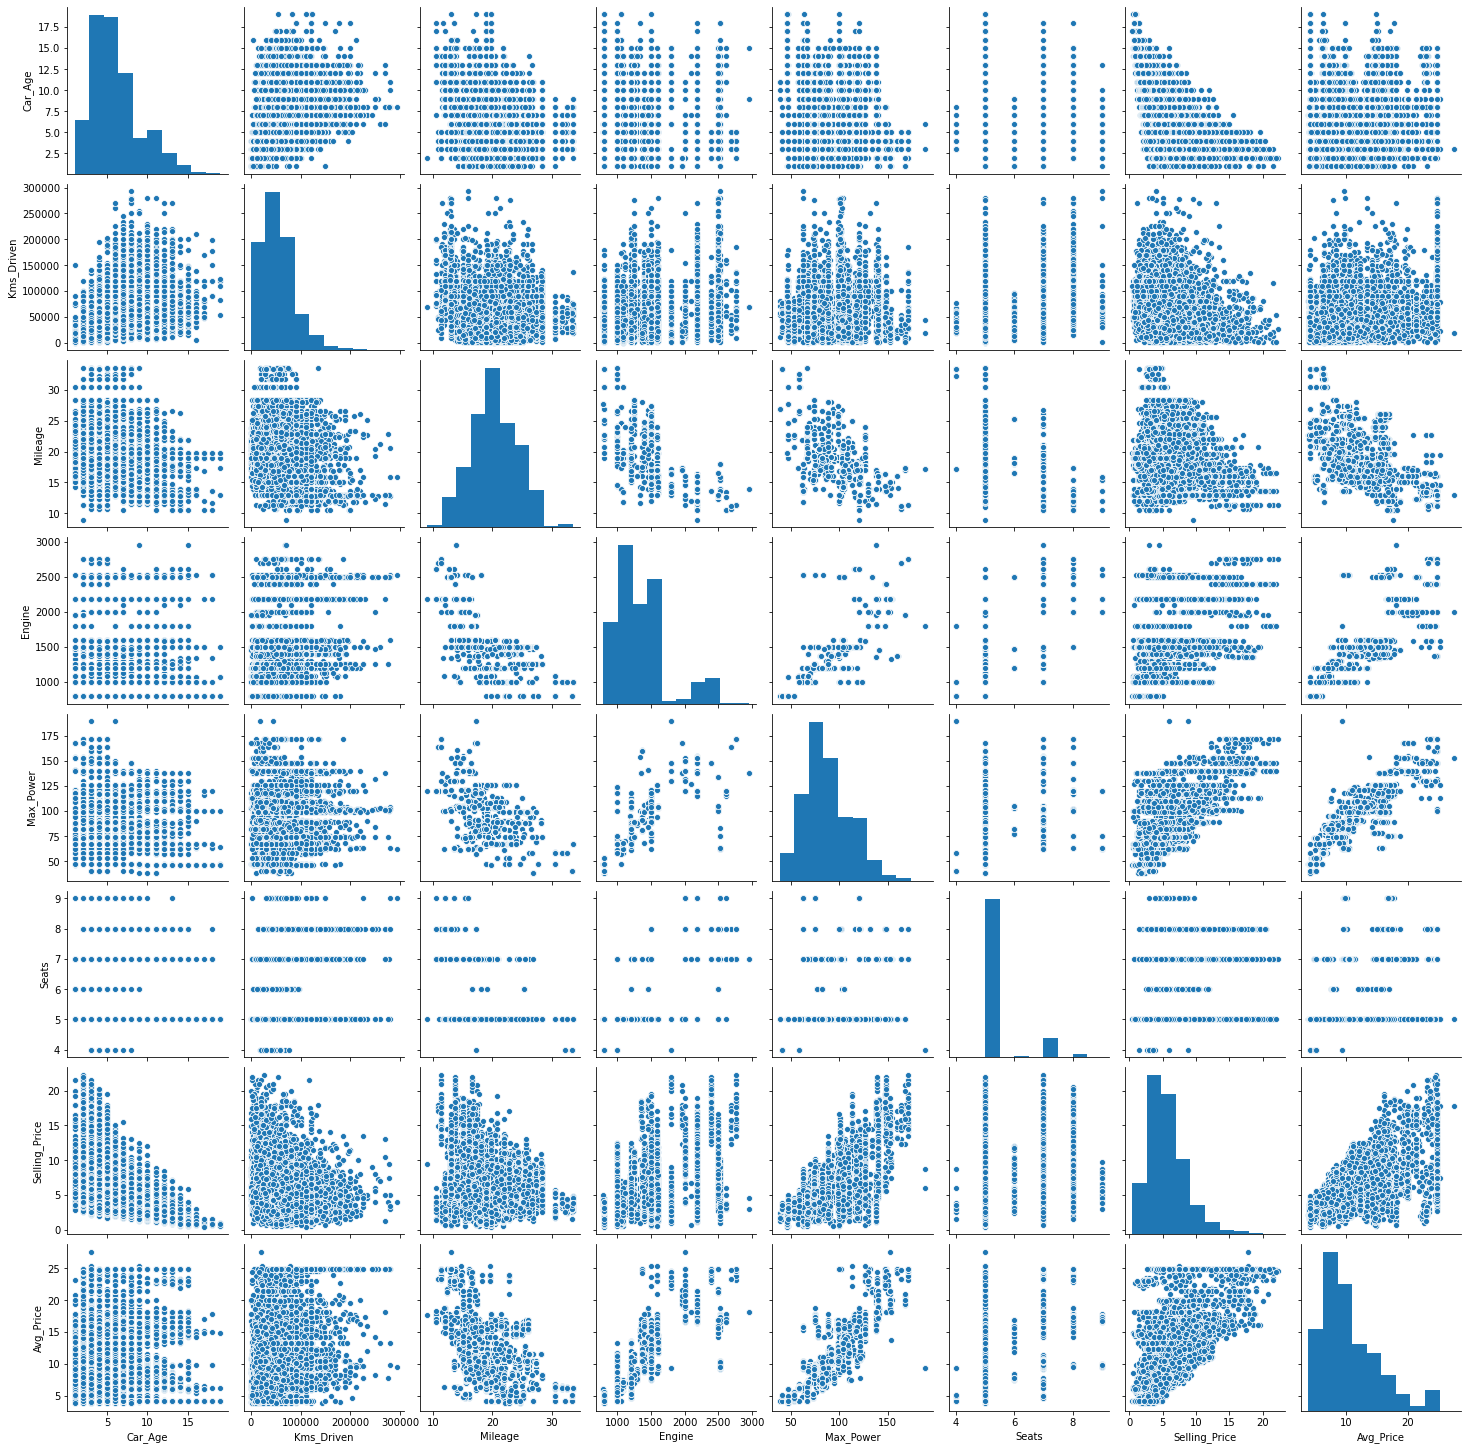

In [47]:
sns.pairplot(dataset)

# Creating Model

In [48]:
Car_Data=dataset.copy()

In [49]:
#Dropping Column 'Car_Name' from Car_Data
Car_Data=Car_Data.drop(['Car_Name'],axis=1)
Car_Data.head()

Brand     Model  Car_Age  Kms_Driven Seller_Type Fuel_Type  \
0   Maruti      Alto        9    120000.0  Individual    Petrol   
1  Hyundai     Grand        5     20000.0  Individual    Petrol   
2  Hyundai       i20       11     60000.0  Individual    Petrol   
3   Maruti      Alto        9     37000.0  Individual    Petrol   
4     Ford  Ecosport        6     30000.0      Dealer    Diesel   

  Transmission_Type  Mileage  Engine  Max_Power  Seats  Selling_Price  \
0            Manual    19.70   796.0      46.30    5.0           1.20   
1            Manual    18.90  1197.0      82.00    5.0           5.50   
2            Manual    17.00  1197.0      80.00    5.0           2.15   
3            Manual    20.92   998.0      67.10    5.0           2.26   
4            Manual    22.77  1498.0      98.59    5.0           5.70   

   Avg_Price  
0   4.112027  
1   7.295000  
2  10.810042  
3   4.112027  
4  11.965000

In [50]:
numeric=Car_Data[Car_Data.select_dtypes(include=['number']).columns]
numeric=numeric.drop(['Selling_Price'],axis=1)
numy=Car_Data['Selling_Price']

### Finding Correlation of Each Feature in Car_Data

In [51]:
Car_Data.corr()

Car_Age  Kms_Driven   Mileage    Engine  Max_Power     Seats  \
Car_Age        1.000000    0.490607 -0.257210  0.082551  -0.098341  0.074715   
Kms_Driven     0.490607    1.000000 -0.126960  0.335194   0.102101  0.278795   
Mileage       -0.257210   -0.126960  1.000000 -0.547578  -0.452000 -0.471584   
Engine         0.082551    0.335194 -0.547578  1.000000   0.681169  0.719042   
Max_Power     -0.098341    0.102101 -0.452000  0.681169   1.000000  0.328454   
Seats          0.074715    0.278795 -0.471584  0.719042   0.328454  1.000000   
Selling_Price -0.563005   -0.167383 -0.191453  0.505805   0.651191  0.316102   
Avg_Price      0.041192    0.283020 -0.505383  0.847418   0.828866  0.529633   

               Selling_Price  Avg_Price  
Car_Age            -0.563005   0.041192  
Kms_Driven         -0.167383   0.283020  
Mileage            -0.191453  -0.505383  
Engine              0.505805   0.847418  
Max_Power           0.651191   0.828866  
Seats               0.316102   0.529633  
Selling_Price       1.000000   0.627584  
Avg_Price           0.627584   1.000000

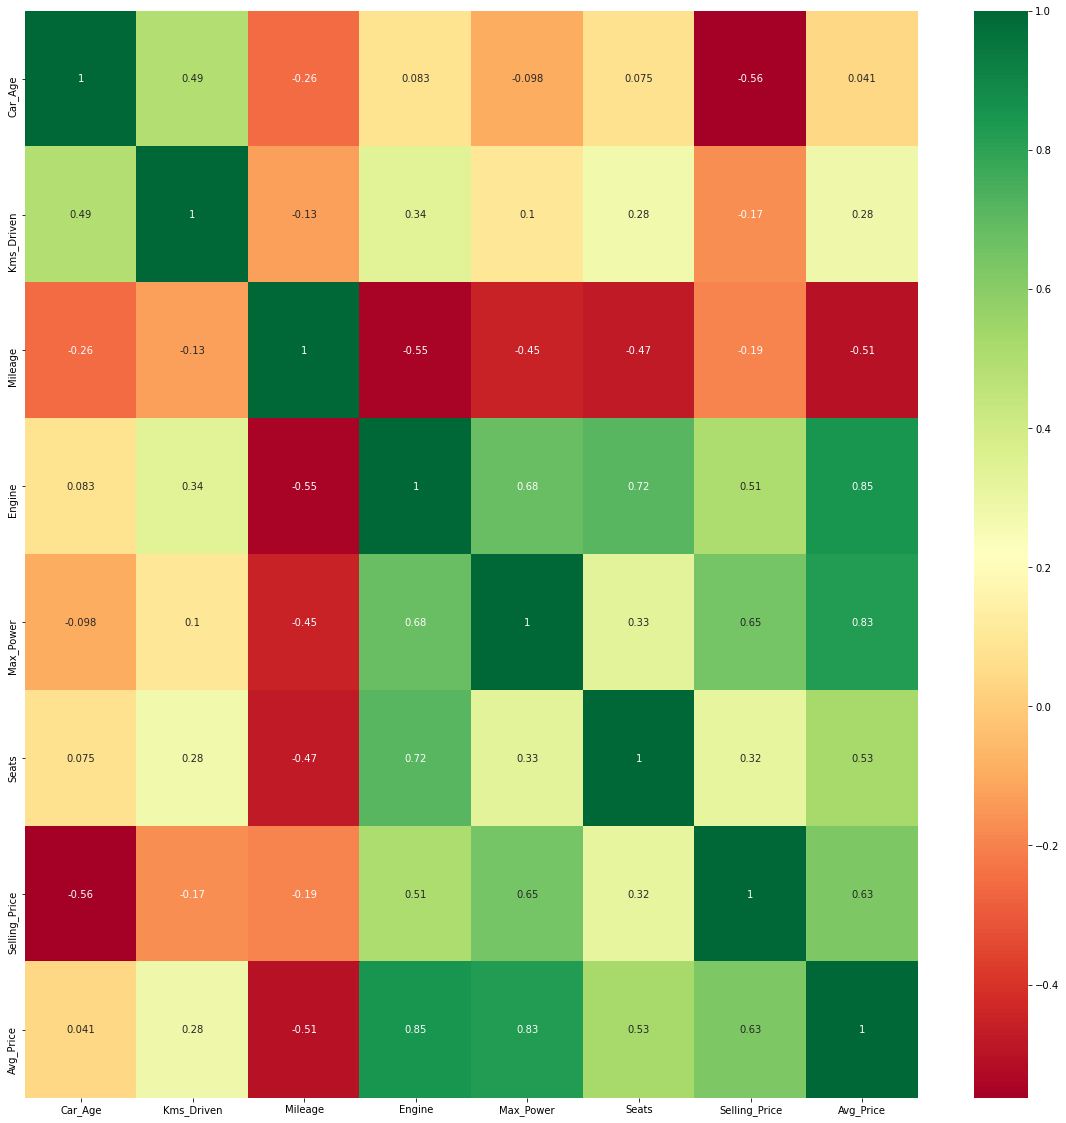

In [52]:
corrmat=Car_Data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Car_Data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Converting Categorical Variables into N-1 Indicator Variables

In [53]:
Car_Data=pd.get_dummies(Car_Data,columns=['Fuel_Type','Transmission_Type','Seller_Type','Brand','Model'],drop_first=True)
Car_Data.head()

Car_Age  Kms_Driven  Mileage  Engine  Max_Power  Seats  Selling_Price  \
0        9    120000.0    19.70   796.0      46.30    5.0           1.20   
1        5     20000.0    18.90  1197.0      82.00    5.0           5.50   
2       11     60000.0    17.00  1197.0      80.00    5.0           2.15   
3        9     37000.0    20.92   998.0      67.10    5.0           2.26   
4        6     30000.0    22.77  1498.0      98.59    5.0           5.70   

   Avg_Price  Fuel_Type_Diesel  Fuel_Type_LPG  ...  Model_Vitara  Model_WR-V  \
0   4.112027                 0              0  ...             0           0   
1   7.295000                 0              0  ...             0           0   
2  10.810042                 0              0  ...             0           0   
3   4.112027                 0              0  ...             0           0   
4  11.965000                 1              0  ...             0           0   

   Model_Wagon R  Model_XL6  Model_XUV300  Model_XUV500  Model_Yaris  \
0              0          0             0             0            0   
1              0          0             0             0            0   
2              0          0             0             0            0   
3              0          0             0             0            0   
4              0          0             0             0            0   

   Model_i10  Model_i20  Model_redi-GO  
0          0          0              0  
1          0          0              0  
2          0          1              0  
3          0          0              0  
4          0          0              0  

[5 rows x 93 columns]

### Splitting the data into Training and Testing sets

In [54]:
from sklearn.model_selection import train_test_split

X=Car_Data.drop(columns=['Selling_Price'],axis=1)
Y=Car_Data['Selling_Price']

x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.3,random_state=101)

In [55]:
x_train=x_train[['Avg_Price','Car_Age','Fuel_Type_Diesel','Fuel_Type_Petrol','Fuel_Type_LPG','Kms_Driven','Seller_Type_Individual','Seller_Type_Trustmark_Dealer','Mileage','Max_Power','Engine','Seats','Transmission_Type_Manual']]
x_test=x_test[['Avg_Price','Car_Age','Fuel_Type_Diesel','Fuel_Type_Petrol','Fuel_Type_LPG','Kms_Driven','Seller_Type_Individual','Seller_Type_Trustmark_Dealer','Mileage','Max_Power','Engine','Seats','Transmission_Type_Manual']]
x_train.head()

Avg_Price  Car_Age  Fuel_Type_Diesel  Fuel_Type_Petrol  Fuel_Type_LPG  \
9707    4.112027        3                 0                 1              0   
16458   8.855000        7                 0                 1              0   
18610   7.138267       10                 0                 1              0   
17399  13.100000       11                 0                 1              0   
6924    7.450000        5                 0                 1              0   

       Kms_Driven  Seller_Type_Individual  Seller_Type_Trustmark_Dealer  \
9707      32000.0                       0                             0   
16458     35000.0                       0                             0   
18610     49000.0                       0                             0   
17399     59000.0                       0                             0   
6924      25000.0                       1                             0   

       Mileage  Max_Power  Engine  Seats  Transmission_Type_Manual  
9707     24.70       47.3   796.0    5.0                         1  
16458    15.50       86.7  1198.0    5.0                         0  
18610    20.36       78.9  1197.0    5.0                         1  
17399    16.09      103.2  1598.0    5.0                         1  
6924     18.15       82.0  1198.0    5.0                         1

In [56]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

CV=[]
R2_train=[]
R2_test=[]

def car_pred_model(model,model_name):
    # Training model
    model.fit(x_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(x_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(x_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,x_train ,y_train ,cv=3)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # MAE
    mae = metrics.mean_absolute_error(y_test,y_pred_test)
    
    # MSE
    mse = metrics.mean_squared_error(y_test,y_pred_test)
    
    
     # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("MAE :", round(mae,5))
    print("MSE :", round(mse,5))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    #ax[1].scatter(x = y_test, y = y_pred_test)
    sns.regplot(x=y_test, y=y_pred_test, robust=True, ci=None)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.78
Test R2-score : 0.77
Train CV scores : [0.77332911 0.77587662 0.77561545]
Train CV mean : 0.77
MAE : 1.02025
MSE : 1.85296


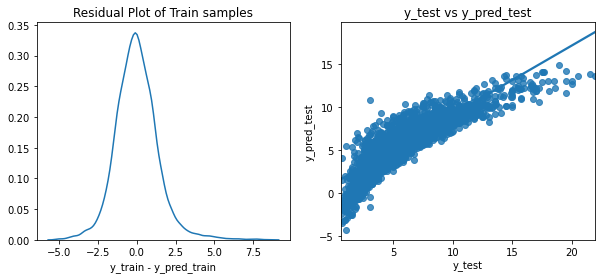

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [59]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [60]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [61]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(x_train,y_train)
#car_pred_model(rf_random,"random_forest.pkl")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  18.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
# R2 score of train set
y_pred_train = rf_random.predict(x_train)
R2_train_model = r2_score(y_train,y_pred_train)
R2_train.append(round(R2_train_model,2))
    
# R2 score of test set
y_pred_test = rf_random.predict(x_test)
R2_test_model = r2_score(y_test,y_pred_test)
R2_test.append(round(R2_test_model,2))

Train R2-score : 0.99
Test R2-score : 0.91
MAE : 0.60325
MSE : 0.72666


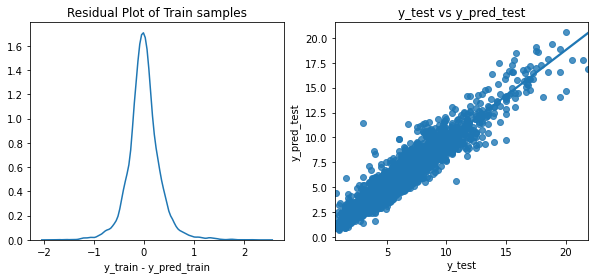

In [63]:
# MAE
mae = metrics.mean_absolute_error(y_test,y_pred_test)
    
# MSE
mse = metrics.mean_squared_error(y_test,y_pred_test)
    
    
# Printing results
print("Train R2-score :",round(R2_train_model,2))
print("Test R2-score :",round(R2_test_model,2))
print("MAE :", round(mae,5))
print("MSE :", round(mse,5))
    
# Plotting Graphs 
# Residual Plot of train data
fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].set_title('Residual Plot of Train samples')
sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
ax[0].set_xlabel('y_train - y_pred_train')
    
# Y_test vs Y_train scatter plot
ax[1].set_title('y_test vs y_pred_test')
#ax[1].scatter(x = y_test, y = y_pred_test)
sns.regplot(x=y_test, y=y_pred_test, robust=True, ci=None)
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('y_pred_test')
    
plt.show()

Train R2-score : 0.78
Test R2-score : 0.77
Train CV scores : [0.77331893 0.77587742 0.7756226 ]
Train CV mean : 0.77
MAE : 1.02017
MSE : 1.85276


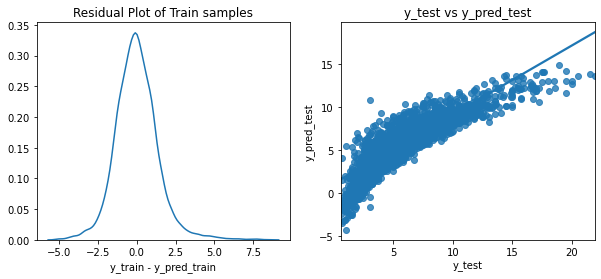

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.78
Test R2-score : 0.77
Train CV scores : [0.77285555 0.77590164 0.77554974]
Train CV mean : 0.77
MAE : 1.02
MSE : 1.85218


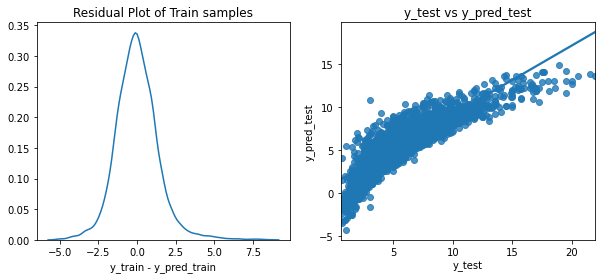

In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
ls_rs.fit(x_train,y_train)

car_pred_model(ls_rs,"lasso.pkl")

In [66]:
import joblib
# open a file, where you ant to store the data
file='Random_Forest_Model.pkl'

# dump information to that file
joblib.dump(rf_random,file)

['Random_Forest_Model.pkl']

In [67]:
# open a file, where you ant to store the data
#file = open('lasso.pkl','wb')

# dump information to that file
#pickle.dump(ls_rs,file)

In [68]:
# open a file, where you ant to store the data
#file = open('ridge.pkl','wb')

# dump information to that file
#pickle.dump(rg_rs,file)